In [ ]:
 # IGNORE WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY PACKAGES
import numpy  as np
# GENERATING RANDOM  OBJECTS

import random 
#  FOR  SYSTEM OPERATIONS

import os

# GENERATING PLOTS
import matplotlib.pyplot as plt

# IMAGE PREPRCESSING
from keras.preprocessing.image import load_img,img_to_array

# MOBILENET APPLICATIONS
from keras.applications import MobileNet

# MODEL OBJECT
from keras.models import Model

# IMAGE OPERATIONS
import cv2

# ONE HOT ENCODING
from keras.utils import to_categorical

# SPLITTING DATA OPERATIONS
from sklearn.model_selection import train_test_split

# TRAINING NEURAL NETWORKS
from keras import regularizers, optimizers

# FULLY CONNCETD LAYERS AND FLATTENING OUTPUT
from keras.layers import Dense,Flatten

 # GENERATING SEQUENTIAL OBJECT
from keras.models import Sequential

# CALL BACKS
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# CLASSIFICATION METRICS
from sklearn.metrics import accuracy_score


# DEEP LEARNING MODEL OBJECTS  TO SAVE
from keras.models import model_from_json

 # DEEP LEARNING  PACKAGE SOURCE API
import keras

#### CHANGING THE SYSTEM  PATH WHERE ACTUAL DATA EXISTS

In [3]:
 # Changes directory from current directory
os.chdir('C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA') 

os.getcwd()  #  gives current directory

'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA'

In [4]:
#  os.walk()  reads about the directory structure , folders, filenames in it

labels=[]
root_folders=[]
for root,dir,filenames in os.walk(os.getcwd()):   
    for i in dir:
        if i != None and i not in ['COVID','NON_COVID']:
            labels.append(i)
    root_folders.append(root)
        

#### root_folders gives a list  of folders of images where the data exists

In [5]:
root_folders = [i for i in root_folders if  not i.split('\\')[-1] in [ 'DATA']]
root_folders

['C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\.ipynb_checkpoints',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_0',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_1',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_10',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_11',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_12',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_13',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_14',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DATA\\non_covid_Patient_15',
 'C:\\Users\\anish_yagt7hg\\Desktop\\internship\\COVID-19_CLASSIFICATION\\DAT

#### labels_and folders maps a tuple in which first element is a path to folder and second element is  label what we are \going to assign to path

In [6]:
labels_and_folders=[(i,j) for i,j in zip(labels,root_folders)]

#### A  folders(label,path) FUNCTION WHICH TAKES PATH AS INPUT AND RETURNING A LIST AS APPENDIMG THE PATH TO THE IMAGES IN A LIST


In [7]:


def folders(label,path):
    folder =[os.path.join(path+'\\'+ file) for file in os.listdir(path)]
    return folder

#### READ_IMAGES(DATA) ACCEPTS A LIST OF IAMGES AND TRANSFORM THEM INTO RESPECTED ARRAYS AND RETURNS AS A ARRAY OF FOLDER OF IMAGES


In [16]:

def READ_IMAGES(data):
    
    for img in range(len(data)):
        data[img] = load_img(data[img],target_size=(224,224,3),color_mode='rgb')     # REDAING IMAGES IN RGB MODE and#    RESIZING IMAGE INTO (224 X 224 x3)
        data[img] = img_to_array(data[img])
        data[img] = data[img]/255                                 #   scaling the value between 0 and 1
        data[img] = cv2.pow(data[img],0.6)                        # applying power transformation for enhancing images 
    return np.array(data)
        

#### feature_vector(model,image) takes input a image array and model as input and returns the mean of features

In [9]:
def feature_vector(model,image):
    ft_vector = model.predict(image)
    feature_vector = np.mean(ft_vector,axis=0)
    return feature_vector
        

####  LABELLING THE TARGET  COLUMN ACCORDINGLY BASED ON FOLDER NAME

In [10]:
def Label(label):
        if label.startswith('non_covid_Patient'):
            return 0
        else:
            return 1


#### feature_vector2(model,image) takes input a image array and model as input and returns the median of features


In [11]:
def feature_vector2(model,image):
    ft_vector = model.predict(image)
    feature_vector = np.median(ft_vector,axis=0)
    return feature_vector
        

#### SETTING MOBILENET INTO NON TRAINABLE

In [12]:
# importing mobilenet model and excluding the top most layer of architecture
mobile_net =MobileNet(include_top=False,weights ='imagenet',input_shape =(224,224,3)) 
# creating output object
output =mobile_net.layers[-1].output

output = keras.layers.Flatten()(output)   # Flattening outpiut layer
 
# creating model instance of input and output
mobilenet_model = Model(mobile_net.input,output)

mobilenet_model .trainable = False

# setting model into non trainable
for layer in mobilenet_model .layers:
    layer.trainable = False

Instructions for updating:
Colocations handled automatically by placer.


#### SUMMARY OF MOBILENET ARCHITECTURE

In [14]:
mobilenet_model.summary()         

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

#### CUSTOM FUNCTION FOR PROCESSING THE ABOVE FUNCCTION AND RETURNS THE MEAN OF FEATURES AND TARGET LABEL ACCORDINGLY

In [14]:
def mobilenet_with_mean(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector(mobile_net,img_list)
    target_label = Label(label)
    return img_features,target_label 

#### PROCESSING THE FOLDERS

In [15]:
mobilenet_data=[]
for i,j in labels_and_folders:
       mobilenet_data.append(mobilenet_with_mean(i,j))

In [18]:
# GETTING  LIST OF TARGET VALUES FROM mobilnet_data list
target_label_mobilenet_mean =[j for i,j in mobilenet_data] 

# converting target into encoding
target_label_mobilenet_mean=to_categorical(target_label_mobilenet_mean)


# MEAN OF FEATURES OF IMAGES
features_mean_mobilenet=[i for i,j in mobilenet_data]


NameError: name 'mobilenet_data' is not defined

#### SPLITTING THE TRAINING AND VALIDATION DATA  FOR MEAN OF FEATURES

In [17]:
mobilenet_mean_X_train,mobilenet_mean_X_test,mobilenet_mean_Y_train,mobilenet_mean_Y_test = train_test_split(features_mean_mobilenet,target_label_mobilenet_mean,
                                                                                                             test_size=0.2,random_state=141895)

print("THE NO.of Images in Training Data are : {} ".format(len(mobilenet_mean_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(mobilenet_mean_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


In [18]:
mobilenet_mean_X_train[0].shape    # 

(7, 7, 1024)

#### AS MODEL ACCEPTS ARRAY OF INPUTS CONVERTING LIST OF ARRAYS INTO ONE SINGLE ARRAY OF ARRAYS

In [19]:
mobilenet_mean_X_train =np.array(mobilenet_mean_X_train)
mobilenet_mean_X_test =np.array(mobilenet_mean_X_test)

#### SIMPLE NEURAL NETWORK

In [20]:
mobilenet_model_mean=Sequential()
mobilenet_model_mean.add(Dense(256,input_shape=(7,7,1024),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


mobilenet_model_mean.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
mobilenet_model_mean.add(Flatten())
mobilenet_model_mean.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
mobilenet_model_mean.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
mobilenet_mean_history=mobilenet_model_mean.fit(mobilenet_mean_X_train, mobilenet_mean_Y_train,
                                              validation_data=(mobilenet_mean_X_test,mobilenet_mean_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Instructions for updating:
Use tf.cast instead.
Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 5s 19ms/step - loss: 8.5850 - acc: 0.5617 - val_loss: 7.4103 - val_acc: 0.7377
Epoch 2/100
243/243 [==============================] - 1s 4ms/step - loss: 6.7318 - acc: 0.5679 - val_loss: 5.4374 - val_acc: 0.7377
Epoch 3/100
243/243 [==============================] - 1s 4ms/step - loss: 5.1793 - acc: 0.6523 - val_loss: 4.5993 - val_acc: 0.5000
Epoch 4/100
243/243 [==============================] - 1s 4ms/step - loss: 4.0228 - acc: 0.6481 - val_loss: 3.4329 - val_acc: 0.7377
Epoch 5/100
243/243 [==============================] - 1s 4ms/step - loss: 3.1833 - acc: 0.6317 - val_loss: 2.7561 - val_acc: 0.7377
Epoch 6/100
243/243 [==============================] - 1s 4ms/step - loss: 2.5432 - acc: 0.7078 - val_loss: 2.2493 - val_acc: 0.7377
Epoch 7/100
243/243 [==============================] - 1s 4ms/step - loss: 2.0506 - acc: 0.6975 - val_loss: 

#### PLOTTING THE LOSS AND ACCURACY OF MODEL WITH MEAN OF FEATURES

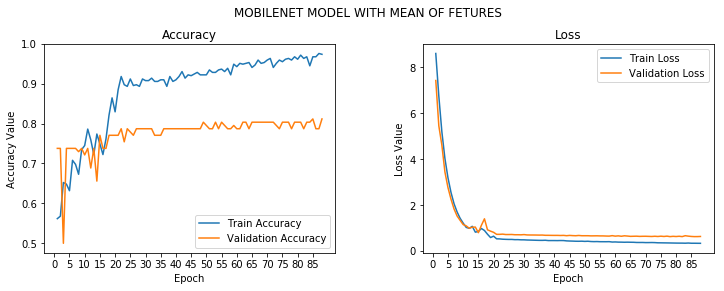

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('MOBILENET MODEL WITH MEAN OF FETURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,89))
ax1.plot(epoch_list, mobilenet_mean_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,mobilenet_mean_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 89, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, mobilenet_mean_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, mobilenet_mean_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 89, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

####  PREDICTIONS BASED ON MEAN OF FEATURES

In [22]:
mobilenet_mean_pred_train =mobilenet_model_mean.predict_classes(mobilenet_mean_X_train)
mobilenet_mean_pred_test =mobilenet_model_mean.predict_classes(mobilenet_mean_X_test)



#### INVERSE TRANSFORMING THE LABELS

In [23]:
mobilenet_labels_mean_train = np.argmax(mobilenet_mean_Y_train,axis=1)
mobilenet_labels_mean_test = np.argmax(mobilenet_mean_Y_test,axis=1)


#### METRIC SCORE FOR THE MODEL

In [24]:
print("ACCURACY SCORE OF MOBILENET with MEAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(mobilenet_mean_pred_train,mobilenet_labels_mean_train)))
      
      
print("ACCURACY SCORE OF MOBILENET with MEAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(mobilenet_mean_pred_test,mobilenet_labels_mean_test)))
      
      
            

ACCURACY SCORE OF MOBILENET with MEAN OF FEATURES ON TRAINING SET IS :0.9711934156378601
ACCURACY SCORE OF MOBILENET with MEAN OF FEATURES ON TEST SET IS :0.8032786885245902


#### MODEL SERIALIZATION

In [25]:
# serialize model to JSON
model_json = mobilenet_model_mean.to_json()
with open("mobilenet_mean.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
mobilenet_model_mean.save_weights("mobilenet_mean.h5")
print("Saved model to disk")


Saved model to disk


#### MOBILENET WITH MEDIAN OF FEATURES

#### CUSTOM FUNCTION FOR PROCESSING THE ABOVE FUNCCTION AND RETURNS THE MEDIAN OF FEATURES AND TARGET LABEL ACCORDINGLY

In [26]:
def mobilenet_with_median(label,path):
    folder =folders(label,path)
    img_list=READ_IMAGES(folder)
    img_list=np.array(img_list)
    img_features =feature_vector2(mobile_net,img_list)
    target_label = Label(label)
    return img_features,target_label 

#### PROCESSING THE FOLDERS

In [27]:
mobilenet_data2=[]
for i,j in labels_and_folders:
       mobilenet_data2.append(mobilenet_with_median(i,j))

In [28]:
# GETTING  LIST OF TARGET VALUES FROM mobilnet_data2 list
target_label_mobilenet_median =[j for i,j in mobilenet_data2]
# converting target into encoding
target_label_mobilenet_median=to_categorical(target_label_mobilenet_median)

# MEDIAN OF FEATURES OF IMAGES

features_median_mobilenet=[i for i,j in mobilenet_data2]


#### SPLITTING THE TRAINING AND VALIDATION DATA  FOR MEDIAN OF FEATURES

In [32]:
mobilenet_median_X_train,mobilenet_median_X_test,mobilenet_median_Y_train,mobilenet_median_Y_test = train_test_split(features_median_mobilenet,target_label_mobilenet_median,
                                                                                                             test_size=0.2,random_state=141094)

print("THE NO.of Images in Training Data are : {} ".format(len(mobilenet_median_X_train)))
print("THE NO.of Images in VALIDATION Data are : {} ".format(len(mobilenet_median_X_test)))


THE NO.of Images in Training Data are : 243 
THE NO.of Images in VALIDATION Data are : 61 


#### AS MODEL ACCEPTS ARRAY OF INPUTS CONVERTING LIST OF ARRAYS INTO ONE SINGLE ARRAY OF ARRAYS

In [33]:
mobilenet_median_X_train =np.array(mobilenet_median_X_train)
mobilenet_median_X_test =np.array(mobilenet_median_X_test)

#### SIMPLE NEURAL NETWORK

In [34]:
mobilenet_model_median=Sequential()
mobilenet_model_median.add(Dense(256,input_shape=(7,7,1024),activation='sigmoid',kernel_initializer='glorot_uniform',
                kernel_regularizer= regularizers.l2()))


mobilenet_model_median.add(Dense(512,activation='sigmoid', kernel_regularizer= regularizers.l2()))
mobilenet_model_median.add(Flatten())
mobilenet_model_median.add(Dense(2, activation='sigmoid'))



#OPtimizers
adam = keras.optimizers.Adam(lr=0.001, decay=0.0005)

## Callbacks
earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

## Compiling the model and defining loss function
mobilenet_model_median.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

## Training neural nets
mobilenet_median_history=mobilenet_model_median.fit(mobilenet_median_X_train, mobilenet_median_Y_train,
                                              validation_data=(mobilenet_median_X_test,mobilenet_median_Y_test),
                                              epochs=100, batch_size=32,
                                              callbacks=[reduce_lr, earlystopper])

Train on 243 samples, validate on 61 samples
Epoch 1/100
243/243 [==============================] - 2s 8ms/step - loss: 8.5093 - acc: 0.5514 - val_loss: 6.9237 - val_acc: 0.7705
Epoch 2/100
243/243 [==============================] - 1s 3ms/step - loss: 6.4604 - acc: 0.5597 - val_loss: 5.6289 - val_acc: 0.7705
Epoch 3/100
243/243 [==============================] - 1s 2ms/step - loss: 5.0486 - acc: 0.5844 - val_loss: 4.1895 - val_acc: 0.7705
Epoch 4/100
243/243 [==============================] - 1s 2ms/step - loss: 4.0215 - acc: 0.5988 - val_loss: 3.3602 - val_acc: 0.5410
Epoch 5/100
243/243 [==============================] - 1s 3ms/step - loss: 3.1143 - acc: 0.6214 - val_loss: 2.6246 - val_acc: 0.7705
Epoch 6/100
243/243 [==============================] - 1s 2ms/step - loss: 2.4600 - acc: 0.6872 - val_loss: 2.1220 - val_acc: 0.7705
Epoch 7/100
243/243 [==============================] - 1s 2ms/step - loss: 1.9739 - acc: 0.6955 - val_loss: 1.9431 - val_acc: 0.4426
Epoch 8/100
243/243 [===

#### PLOTTING THE LOSS AND ACCURACY OF MODEL WITH MEDIAN OF FEATURES

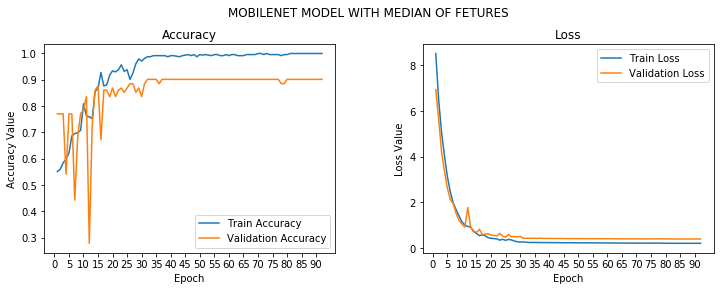

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('MOBILENET MODEL WITH MEDIAN OF FETURES', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,93))
ax1.plot(epoch_list, mobilenet_median_history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list,mobilenet_median_history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 93, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, mobilenet_median_history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, mobilenet_median_history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 93, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

####  PREDICTIONS BASED ON MEDIAN OF FEATURES

In [36]:
mobilenet_median_pred_train =mobilenet_model_median.predict_classes(mobilenet_median_X_train)
mobilenet_median_pred_test =mobilenet_model_median.predict_classes(mobilenet_median_X_test)


#### INVERSE TRANSFORMING THE LABELS

In [37]:
mobilenet_labels_median_train = np.argmax(mobilenet_median_Y_train,axis=1)
mobilenet_labels_median_test = np.argmax(mobilenet_median_Y_test,axis=1)


#### METRIC SCORE FOR MEDIAN OF FEATURES

In [38]:
print("ACCURACY SCORE OF MOBILENET with MEDIAN OF FEATURES ON TRAINING SET IS :{}".
      format(accuracy_score(mobilenet_median_pred_train,mobilenet_labels_median_train)))
      
      
print("ACCURACY SCORE OF MOBILENET with MEDIAN OF FEATURES ON TEST SET IS :{}".
      format(accuracy_score(mobilenet_median_pred_test,mobilenet_labels_median_test)))
      
      
            

ACCURACY SCORE OF MOBILENET with MEDIAN OF FEATURES ON TRAINING SET IS :1.0
ACCURACY SCORE OF MOBILENET with MEDIAN OF FEATURES ON TEST SET IS :0.9016393442622951


#### MODEL SERIALIZATION

In [39]:
# serialize model to JSON
model_json = mobilenet_model_median.to_json()
with open("mobilenet_median.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
mobilenet_model_median.save_weights("mobilenet_median.h5")
print("Saved model to disk")


Saved model to disk
